In [ ]:
# !pip install geopandas

In [182]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import urllib.request as req
import time
import folium
import geopandas as gpd
import html5lib as html

In [15]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [78]:
jeju_total = pd.read_csv("../JejuData/jeju_total.csv",index_col=0,thousands=",")
jeju_foreigner = pd.read_csv("../JejuData/jeju_foreigner.csv",index_col=0,thousands=",")

In [54]:
jeju_total['권역'].unique()
jeju_foreigner['권역'].unique()

array(['제주시 동권역', '제주시 동부권역', '서귀포시 동부권역', '서귀포시 동권역', '서귀포시 서부권역',
       '제주시 서부권역', '도서산간'], dtype=object)

In [91]:
jeju_total.describe()
jeju_foreigner.describe()

,2019년 01월,2019년 02월,2019년 03월,2019년 04월,2019년 05월,2019년 06월,2019년 07월,2019년 08월,2019년 09월,2019년 10월,...,2022년 02월,2022년 03월,2022년 04월,2022년 05월,2022년 06월,2022년 07월,2022년 08월,2022년 09월,2022년 10월,2022년 11월
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,...,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,4745.790698,5164.372093,5474.232558,6851.232558,6996.023256,7447.023256,7690.116279,10579.209302,7990.116279,9197.325581,...,160.325581,172.534884,211.906977,244.534884,288.790698,371.837209,517.139535,429.883721,644.953488,428.302326
std,6483.476557,6961.944043,7680.108248,9175.115310,9338.631690,10106.032679,10876.196020,14982.611749,12666.220886,13830.183853,...,195.076019,220.525384,242.674171,298.462357,352.771851,457.573514,634.010312,562.408478,715.158023,500.312356
min,419.000000,344.000000,286.000000,326.000000,428.000000,497.000000,383.000000,574.000000,611.000000,623.000000,...,16.000000,19.000000,11.000000,14.000000,27.000000,17.000000,43.000000,35.000000,45.000000,33.000000
25%,1570.500000,1903.000000,1795.000000,2253.000000,2255.000000,2244.500000,2378.000000,3510.000000,2615.000000,3260.500000,...,53.000000,47.500000,58.500000,74.500000,77.000000,110.500000,160.500000,140.500000,191.000000,125.000000
50%,2903.000000,3305.000000,3157.000000,3795.000000,4160.000000,3964.000000,4125.000000,5149.000000,4873.000000,6114.000000,...,115.000000,109.000000,137.000000,133.000000,167.000000,213.000000,314.000000,268.000000,418.000000,280.000000
75%,4946.500000,5766.000000,5470.500000,7756.500000,7483.000000,7540.500000,8307.000000,11398.000000,8273.000000,9192.500000,...,176.000000,212.000000,240.000000,243.000000,302.000000,400.000000,559.500000,486.000000,648.000000,506.000000
max,40299.000000,43071.000000,46853.000000,55093.000000,53941.000000,57935.000000,64536.000000,88987.000000,78717.000000,86044.000000,...,1193.000000,1327.000000,1351.000000,1328.000000,1814.000000,2513.000000,3630.000000,3417.000000,3162.000000,2748.000000


In [93]:
total_ordered = jeju_total.groupby(jeju_total['권역'])
total_ordered = total_ordered.sum()

In [92]:
foreigner_ordered = jeju_foreigner.groupby(jeju_foreigner['권역'])
foreigner_ordered = foreigner_ordered.sum()

In [125]:
total_ordered

,2019년 01월,2019년 02월,2019년 03월,2019년 04월,2019년 05월,2019년 06월,2019년 07월,2019년 08월,2019년 09월,2019년 10월,...,2022년 02월,2022년 03월,2022년 04월,2022년 05월,2022년 06월,2022년 07월,2022년 08월,2022년 09월,2022년 10월,2022년 11월
권역,,,,,,,,,,,,,,,,,,,,,
도서산간,140293,136446,175425,177985,175503,161556,174139,244376,131114,199238,...,168722,140828,210402,262466,241642,227044,306444,184395,267688,189683
서귀포시 동권역,1958171,1788516,1761859,1956400,2254186,2020152,2155775,2739449,1829267,2307950,...,2710342,1953019,2641175,3012979,2992123,3070169,3503420,2326296,2782176,2191836
서귀포시 동부권역,1257806,1135807,1207840,1397623,1458903,1348135,1296372,1630355,1184611,1573762,...,1628759,1201125,1688375,1872596,1794343,1660752,1953273,1356546,1745931,1438815
서귀포시 서부권역,812809,752514,800139,936671,972925,883818,865458,1075576,762292,993569,...,1328369,955337,1331896,1542979,1499321,1407506,1754748,1143182,1538467,1212571
제주시 동권역,3647194,3412394,3528180,3778284,3975993,3841303,3949365,4871884,3608715,4174673,...,4999880,3873933,4879039,5419417,5552072,5426795,6047152,4396510,4223871,3922070
제주시 동부권역,903741,823092,967979,1126280,1232294,1152171,1192727,1477972,1023477,1372546,...,1357055,1023619,1382313,1622469,1587929,1578386,1888265,1245964,1763008,1290656
제주시 서부권역,1147803,1057354,1164887,1329351,1438204,1422988,1538885,1947641,1279724,1570970,...,2093396,1538128,1973612,2285562,2330316,2403205,2838463,1767762,2102598,1693505


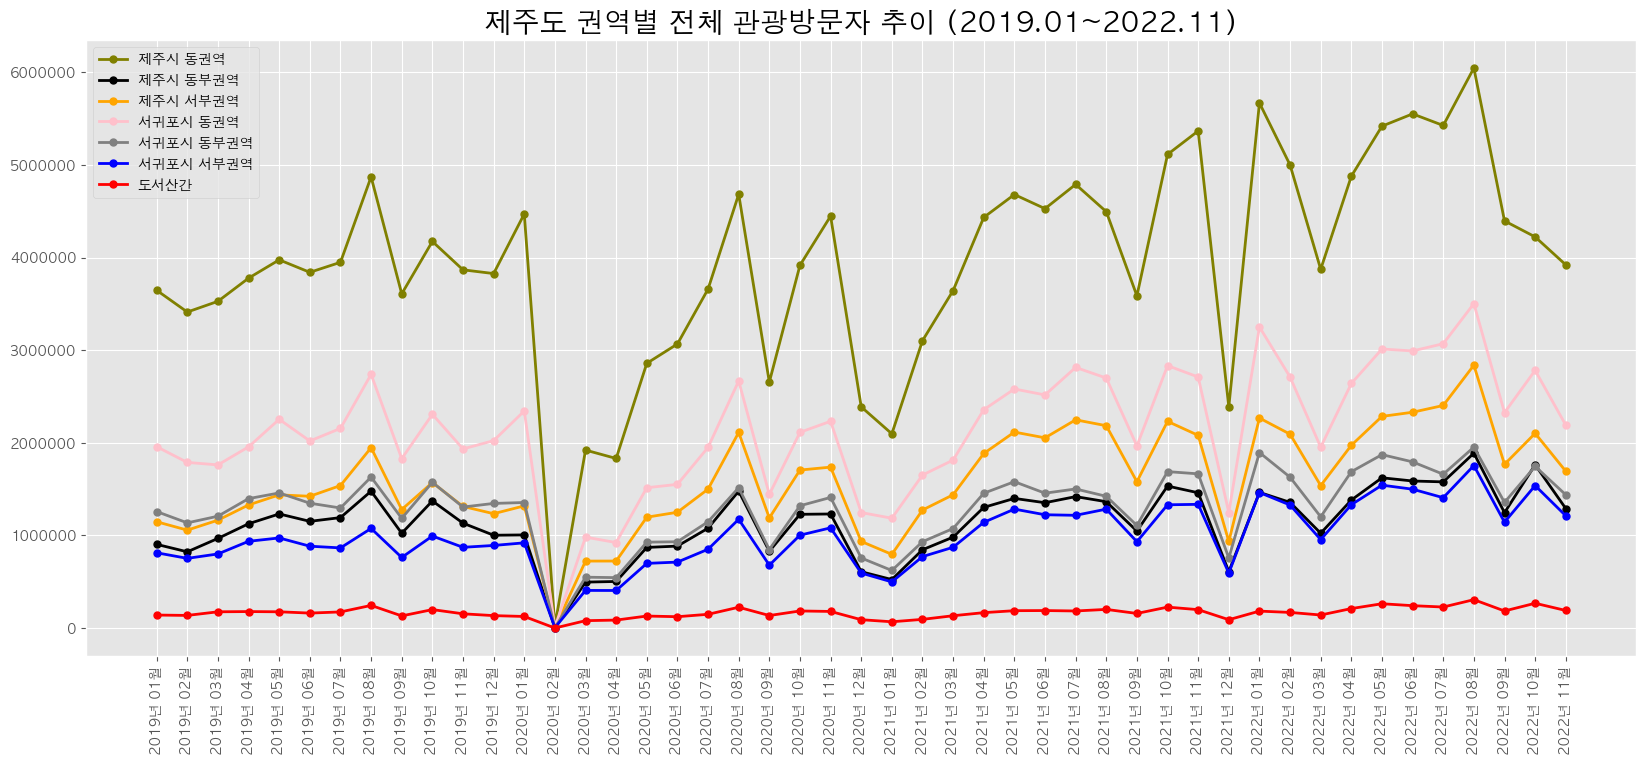

In [130]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,1,1)

ax.plot(
    total_ordered.columns,
    total_ordered.loc['제주시 동권역'],
    marker='o',
    # markerfacecolor='green',
    markersize=5,
    color='olive',
    linewidth=2,
    label='제주시 동권역'
)

ax.plot(
    total_ordered.columns,
    total_ordered.loc['제주시 동부권역'],
    marker='o',
    # markerfacecolor='green',
    markersize=5,
    color='black',
    linewidth=2,
    label='제주시 동부권역'
)
ax.plot(
    total_ordered.columns,
    total_ordered.loc['제주시 서부권역'],
    marker='o',
    # markerfacecolor='green',
    markersize=5,
    color='orange',
    linewidth=2,
    label='제주시 서부권역'
)
ax.plot(
    total_ordered.columns,
    total_ordered.loc['서귀포시 동권역'],
    marker='o',
    # markerfacecolor='green',
    markersize=5,
    color='pink',
    linewidth=2,
    label='서귀포시 동권역'
)
ax.plot(
    total_ordered.columns,
    total_ordered.loc['서귀포시 동부권역'],
    marker='o',
    # markerfacecolor='green',
    markersize=5,
    color='gray',
    linewidth=2,
    label='서귀포시 동부권역'
)
ax.plot(
    total_ordered.columns,
    total_ordered.loc['서귀포시 서부권역'],
    marker='o',
    # markerfacecolor='green',
    markersize=5,
    color='blue',
    linewidth=2,
    label='서귀포시 서부권역'
)
ax.plot(
    total_ordered.columns,
    total_ordered.loc['도서산간'],
    marker='o',
    # markerfacecolor='green',
    markersize=5,
    color='red',
    linewidth=2,
    label='도서산간'
)
plt.title('제주도 권역별 전체 관광방문자 추이 (2019.01~2022.11)',size=20)
plt.legend(loc='best')
ax.set_xticklabels(total_ordered.columns,rotation=90)
plt.ticklabel_format(axis='y',useOffset=False, style='plain')
plt.show()

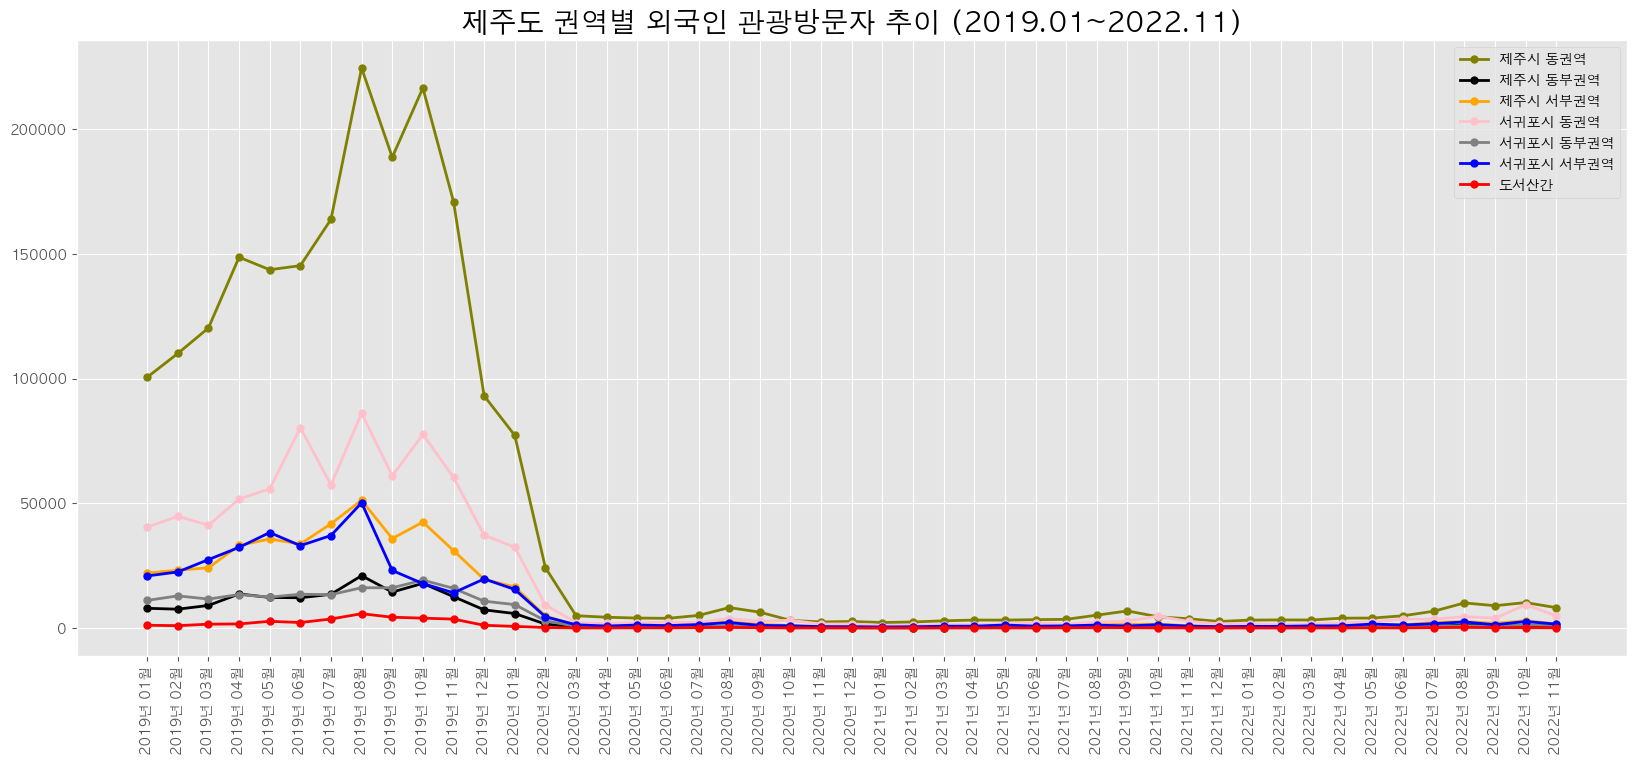

In [129]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,1,1)

ax.plot(
    foreigner_ordered.columns,
    foreigner_ordered.loc['제주시 동권역'],
    marker='o',
    # markerfacecolor='green',
    markersize=5,
    color='olive',
    linewidth=2,
    label='제주시 동권역'
)

ax.plot(
    foreigner_ordered.columns,
    foreigner_ordered.loc['제주시 동부권역'],
    marker='o',
    # markerfacecolor='green',
    markersize=5,
    color='black',
    linewidth=2,
    label='제주시 동부권역'
)
ax.plot(
    foreigner_ordered.columns,
    foreigner_ordered.loc['제주시 서부권역'],
    marker='o',
    # markerfacecolor='green',
    markersize=5,
    color='orange',
    linewidth=2,
    label='제주시 서부권역'
)
ax.plot(
    foreigner_ordered.columns,
    foreigner_ordered.loc['서귀포시 동권역'],
    marker='o',
    # markerfacecolor='green',
    markersize=5,
    color='pink',
    linewidth=2,
    label='서귀포시 동권역'
)
ax.plot(
    foreigner_ordered.columns,
    foreigner_ordered.loc['서귀포시 동부권역'],
    marker='o',
    # markerfacecolor='green',
    markersize=5,
    color='gray',
    linewidth=2,
    label='서귀포시 동부권역'
)
ax.plot(
    foreigner_ordered.columns,
    foreigner_ordered.loc['서귀포시 서부권역'],
    marker='o',
    # markerfacecolor='green',
    markersize=5,
    color='blue',
    linewidth=2,
    label='서귀포시 서부권역'
)
ax.plot(
    foreigner_ordered.columns,
    foreigner_ordered.loc['도서산간'],
    marker='o',
    # markerfacecolor='green',
    markersize=5,
    color='red',
    linewidth=2,
    label='도서산간'
)
plt.title('제주도 권역별 외국인 관광방문자 추이 (2019.01~2022.11)',size=20)
plt.legend(loc='best')
ax.set_xticklabels(foreigner_ordered.columns,rotation=90)
plt.ticklabel_format(axis='y',useOffset=False, style='plain')
plt.show()

In [135]:
total_ordered.to_csv("../JejuData/total_ordered.csv")
foreigner_ordered.to_csv("../JejuData/foreigner_ordered.csv")

In [138]:
# pd.read_csv("../JejuData/total_ordered.csv")
# pd.read_csv("../JejuData/foreigner_ordered.csv")

# 추자면 우도면은 각각 제주시 서부권, 제주시 동부권에 소속되어있음. 권역 변경

In [143]:
jeju_total.index

Index(['건입동', '구좌읍', '남원읍', '노형동', '대륜동', '대정읍', '대천동', '도두동', '동홍동', '봉개동',
       '삼도일동', '삼도이동', '삼양동', '서홍동', '성산읍', '송산동', '아라동', '안덕면', '애월읍', '연동',
       '영천동', '예래동', '오라동', '외도동', '용담일동', '용담이동', '우도면', '이도일동', '이도이동',
       '이호동', '일도일동', '일도이동', '정방동', '조천읍', '중문동', '중앙동', '천지동', '추자면', '표선면',
       '한경면', '한림읍', '화북동', '효돈동'],
      dtype='object', name='행정동명')

In [144]:
jeju_total.loc[jeju_total.index=='추자면','권역'] = '제주시 서부권역'

In [145]:
jeju_total.loc[jeju_total.index=='우도면','권역'] = '제주시 동부권역'

In [147]:
# jeju_total

In [148]:
jeju_foreigner.loc[jeju_foreigner.index=='추자면','권역'] = '제주시 서부권역'
jeju_foreigner.loc[jeju_foreigner.index=='우도면','권역'] = '제주시 동부권역'

---
### 바뀐 권역으로 다시 분류

In [149]:
total_ordered = jeju_total.groupby(jeju_total['권역'])
total_ordered = total_ordered.sum()
foreigner_ordered = jeju_foreigner.groupby(jeju_foreigner['권역'])
foreigner_ordered = foreigner_ordered.sum()

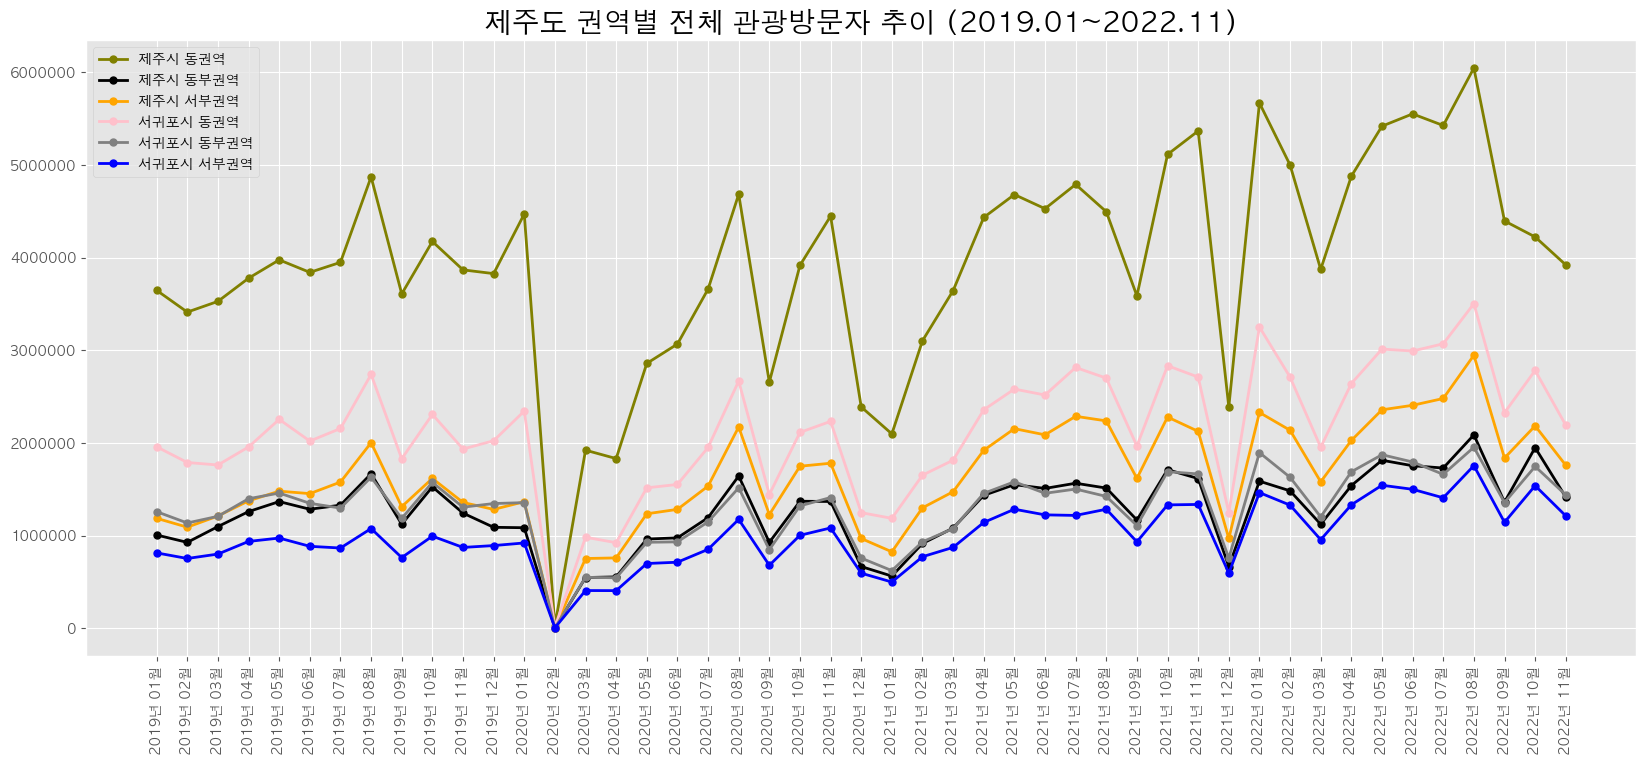

In [150]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,1,1)

ax.plot(
    total_ordered.columns,
    total_ordered.loc['제주시 동권역'],
    marker='o',
    # markerfacecolor='green',
    markersize=5,
    color='olive',
    linewidth=2,
    label='제주시 동권역'
)

ax.plot(
    total_ordered.columns,
    total_ordered.loc['제주시 동부권역'],
    marker='o',
    # markerfacecolor='green',
    markersize=5,
    color='black',
    linewidth=2,
    label='제주시 동부권역'
)
ax.plot(
    total_ordered.columns,
    total_ordered.loc['제주시 서부권역'],
    marker='o',
    # markerfacecolor='green',
    markersize=5,
    color='orange',
    linewidth=2,
    label='제주시 서부권역'
)
ax.plot(
    total_ordered.columns,
    total_ordered.loc['서귀포시 동권역'],
    marker='o',
    # markerfacecolor='green',
    markersize=5,
    color='pink',
    linewidth=2,
    label='서귀포시 동권역'
)
ax.plot(
    total_ordered.columns,
    total_ordered.loc['서귀포시 동부권역'],
    marker='o',
    # markerfacecolor='green',
    markersize=5,
    color='gray',
    linewidth=2,
    label='서귀포시 동부권역'
)
ax.plot(
    total_ordered.columns,
    total_ordered.loc['서귀포시 서부권역'],
    marker='o',
    # markerfacecolor='green',
    markersize=5,
    color='blue',
    linewidth=2,
    label='서귀포시 서부권역'
)

plt.title('제주도 권역별 전체 관광방문자 추이 (2019.01~2022.11)',size=20)
plt.legend(loc='best')
ax.set_xticklabels(total_ordered.columns,rotation=90)
plt.ticklabel_format(axis='y',useOffset=False, style='plain')
plt.show()

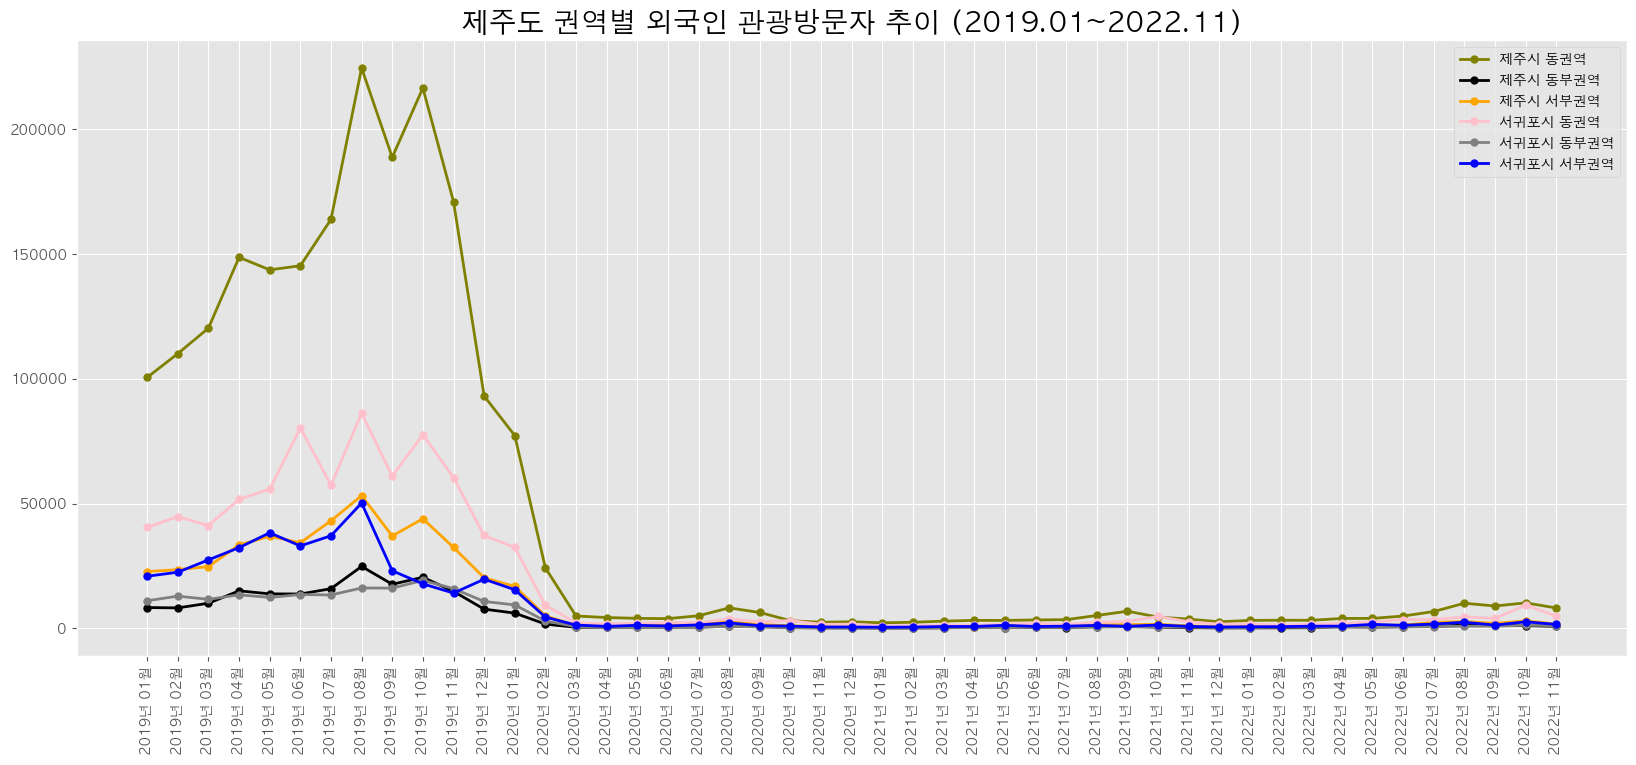

In [151]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(1,1,1)

ax.plot(
    foreigner_ordered.columns,
    foreigner_ordered.loc['제주시 동권역'],
    marker='o',
    # markerfacecolor='green',
    markersize=5,
    color='olive',
    linewidth=2,
    label='제주시 동권역'
)

ax.plot(
    foreigner_ordered.columns,
    foreigner_ordered.loc['제주시 동부권역'],
    marker='o',
    # markerfacecolor='green',
    markersize=5,
    color='black',
    linewidth=2,
    label='제주시 동부권역'
)
ax.plot(
    foreigner_ordered.columns,
    foreigner_ordered.loc['제주시 서부권역'],
    marker='o',
    # markerfacecolor='green',
    markersize=5,
    color='orange',
    linewidth=2,
    label='제주시 서부권역'
)
ax.plot(
    foreigner_ordered.columns,
    foreigner_ordered.loc['서귀포시 동권역'],
    marker='o',
    # markerfacecolor='green',
    markersize=5,
    color='pink',
    linewidth=2,
    label='서귀포시 동권역'
)
ax.plot(
    foreigner_ordered.columns,
    foreigner_ordered.loc['서귀포시 동부권역'],
    marker='o',
    # markerfacecolor='green',
    markersize=5,
    color='gray',
    linewidth=2,
    label='서귀포시 동부권역'
)
ax.plot(
    foreigner_ordered.columns,
    foreigner_ordered.loc['서귀포시 서부권역'],
    marker='o',
    # markerfacecolor='green',
    markersize=5,
    color='blue',
    linewidth=2,
    label='서귀포시 서부권역'
)
plt.title('제주도 권역별 외국인 관광방문자 추이 (2019.01~2022.11)',size=20)
plt.legend(loc='best')
ax.set_xticklabels(foreigner_ordered.columns,rotation=90)
plt.ticklabel_format(axis='y',useOffset=False, style='plain')
plt.show()

In [154]:
jeju_total.to_csv("../JejuData/jeju_total.csv")
jeju_foreigner.to_csv("../JejuData/jeju_foreigner.csv")

In [ ]:
pd.read_csv("../JejuData/jeju_total.csv")
pd.read_csv("../JejuData/jeju_foreigner.csv")

In [157]:
total_ordered.to_csv("../JejuData/total_ordered.csv")
foreigner_ordered.to_csv("../JejuData/foreigner_ordered.csv")

In [159]:
# 월별, 권역별, 읍면동별 관광지 수, 면적, 방문자 수 정제 데이터
pd.read_csv("../JejuData/jeju_total_cleaned.csv")

,연도,월,권역,읍면동,관광지 수,면적,방문자수
0,2019,1,제주시 동권역,건입동,8.0,2825867.0,128123
1,2019,2,제주시 동권역,건입동,8.0,2825867.0,115266
2,2019,3,제주시 동권역,건입동,8.0,2825867.0,132868
3,2019,4,제주시 동권역,건입동,8.0,2825867.0,141119
4,2019,5,제주시 동권역,건입동,8.0,2825867.0,145939
...,...,...,...,...,...,...,...
1264,2022,7,제주시 서부권역,한림읍,64.0,91090000.0,794794
1265,2022,8,제주시 서부권역,한림읍,64.0,91090000.0,937798
1266,2022,9,제주시 서부권역,한림읍,64.0,91090000.0,550934
1267,2022,10,제주시 서부권역,한림읍,64.0,91090000.0,688258


In [ ]:
# !pip install geopy

In [161]:
from geopy.geocoders import Nominatim

def geocoding_reverse(lat_lng_str): 
    geolocoder = Nominatim(user_agent = 'South Korea', timeout=None)
    address = geolocoder.reverse(lat_lng_str)

    return address

address = geocoding_reverse('36.5760732781656, 128.15935928504484')
print(address)

교촌리, 상주시, 경상북도, 37107, 대한민국


In [162]:
import requests, json

def get_address(lat, lng):
    url = "https://dapi.kakao.com/v2/local/geo/coord2regioncode.json?x="+lng+"&y="+lat
    headers = {"Authorization": "KakaoAK 58a121e47f12feb18b59802757d24c11"}
    api_json = requests.get(url, headers=headers)
    full_address = json.loads(api_json.text)

    return full_address

full_address = get_address('33.357773', '126.462520')
full_address['documents'][0]['address_name']

'제주특별자치도 서귀포시 색달동'

In [197]:
total_ordered_transposed = total_ordered.reset_index().transpose()
foreigner_ordered_transposed = foreigner_ordered.reset_index().transpose()

In [204]:
colnames=total_ordered_transposed.iloc[0]

In [212]:
total_ordered_transposed.columns = colnames
total_ordered_transposed.drop(index='권역',inplace=True)
foreigner_ordered_transposed.columns = colnames
foreigner_ordered_transposed.drop(index='권역',inplace=True)

In [231]:
total_ordered_transposed.rename_axis(columns='년월',inplace=True)
foreigner_ordered_transposed.rename_axis(columns='년월',inplace=True)

In [251]:
total_ordered_transposed.reset_index(inplace=True)
foreigner_ordered_transposed.reset_index(inplace=True)

In [257]:
total_ordered_transposed.to_csv("../JejuData/total_ordered_transposed.csv",index=False)
foreigner_ordered_transposed.to_csv("../JejuData/foreigner_ordered_transposed.csv",index=False)

In [259]:
jeju_total_cleaned = pd.read_csv("../JejuData/jeju_total_cleaned.csv")
jeju_total_cleaned

,연도,월,권역,읍면동,관광지 수,면적,방문자수
0,2019,1,제주시 동권역,건입동,8.0,2825867.0,128123
1,2019,2,제주시 동권역,건입동,8.0,2825867.0,115266
2,2019,3,제주시 동권역,건입동,8.0,2825867.0,132868
3,2019,4,제주시 동권역,건입동,8.0,2825867.0,141119
4,2019,5,제주시 동권역,건입동,8.0,2825867.0,145939
...,...,...,...,...,...,...,...
1264,2022,7,제주시 서부권역,한림읍,64.0,91090000.0,794794
1265,2022,8,제주시 서부권역,한림읍,64.0,91090000.0,937798
1266,2022,9,제주시 서부권역,한림읍,64.0,91090000.0,550934
1267,2022,10,제주시 서부권역,한림읍,64.0,91090000.0,688258


In [261]:
pd.read_csv("../JejuData/20230210160221_인기관광지_외지인.csv",encoding='euc-kr')

,순위,관광지명,주소,분류,외지인 검색 수
0,1,제주국제공항,제주 제주시 공항로 2-0,교통시설,546311
1,2,동문재래시장,제주 제주시 관덕로14길 20-0,시장,235436
2,3,서귀포매일올레시장,제주 서귀포시 중앙로62번길 18-0,시장,216291
3,4,성산일출봉,제주 서귀포시 일출로 284-12,자연경관(산),162257
4,5,협재해수욕장,제주 제주시,자연경관(하천/해양),148831
...,...,...,...,...,...
95,96,라마다제주시티홀호텔,제주 제주시 중앙로 304-0,호텔,19260
96,97,호텔휘슬락,제주 제주시 서부두2길 26-0,호텔,19239
97,98,제주곶자왈도립공원,제주 서귀포시 에듀시티로 178-0,자연공원,19224
98,99,베스트웨스턴제주호텔,제주 제주시 도령로 27-0,호텔,18970


In [275]:
spend_trend = pd.read_csv("../JejuData/20230210161314_신용카드 소비액 추이.csv",encoding='euc-kr')

In [276]:
spend_trend

,기준연월,소비금액(시도),소비금액(시군구)
0,202201,96497105243.00000,0.00000
1,202202,87360657645.00000,0.00000
2,202203,84474402012.00000,0.00000
3,202204,111394713497.00000,0.00000
4,202205,122981101939.00000,0.00000
5,202206,119589817024.00000,0.00000
6,202207,114261166028.00000,0.00000
7,202208,124756958828.00000,0.00000
8,202209,88724462146.00000,0.00000
9,202210,113085426247.00000,0.00000


In [277]:
np.sum(spend_trend['소비금액(시도)'])

1238538774602.0

In [278]:
np.sum(expenditure['중분류 소비액(천원)'])

1238538774.6020002

In [279]:
time = pd.read_csv("../JejuData/20230210162734_요일_시간대 별 방문자 집중율.csv",encoding='euc-kr')

In [280]:
time

,요일,방문 시간대,방문자 집중률
0,일요일,00~06시,4.10000
1,일요일,06~11시,3.10000
2,일요일,11~14시,1.70000
3,일요일,14~18시,2.10000
4,일요일,18~21시,1.80000
5,일요일,21~24시,1.80000
6,월요일,00~06시,3.80000
7,월요일,06~11시,2.90000
8,월요일,11~14시,1.60000
9,월요일,14~18시,2.10000


In [283]:
main_spot = pd.read_csv("../JejuData/20230210163135_중심 관광지.csv",encoding='euc-kr')
main_spot

,중심 POI X 좌표,중심 POI Y 좌표,관광지명,주소,중심카테고리 명_대,분류,순위
0,126.49280,33.50700,제주국제공항,제주 제주시 공항로 2-0,관광지,기타관광,1
1,126.56380,33.24940,서귀포매일올레시장,제주 서귀포시 중앙로62번길 18-0,관광지,쇼핑,2
2,126.52750,33.51220,동문재래시장,제주 제주시 관덕로14길 20-0,관광지,쇼핑,3
3,126.94180,33.45820,성산일출봉,제주 서귀포시 일출로 284-12,관광지,자연관광,4
4,126.23960,33.39410,협재해수욕장,제주 제주시,관광지,자연관광,5
...,...,...,...,...,...,...,...
95,126.74360,33.42400,제주워터서커스,제주 제주시 번영로 2172-80,관광지,문화관광,96
96,126.91710,33.44960,더베스트제주성산,제주 서귀포시 동류암로 26-0,숙박,숙박,97
97,126.58170,33.24650,서귀포칼호텔,제주 서귀포시 칠십리로 242-0,숙박,숙박,98
98,126.96760,33.51510,비양도,제주 제주시,관광지,자연관광,99


In [284]:
main_spot_2022_12 = pd.read_csv("../JejuData/20230210163424_중심 관광지.csv",encoding='euc-kr')
main_spot_2022_12

,중심 POI X 좌표,중심 POI Y 좌표,관광지명,주소,중심카테고리 명_대,분류,순위
0,126.56380,33.24940,서귀포매일올레시장,제주 서귀포시 중앙로62번길 18-0,관광지,쇼핑,1
1,126.49280,33.50700,제주국제공항,제주 제주시 공항로 2-0,관광지,기타관광,2
2,126.52750,33.51220,동문재래시장,제주 제주시 관덕로14길 20-0,관광지,쇼핑,3
3,126.94180,33.45820,성산일출봉,제주 서귀포시 일출로 284-12,관광지,자연관광,4
4,126.36970,33.28970,카멜리아힐,제주 서귀포시 병악로 166-0,관광지,문화관광,5
...,...,...,...,...,...,...,...
95,126.91710,33.44960,더베스트제주성산,제주 서귀포시 동류암로 26-0,숙박,숙박,96
96,126.23910,33.38950,한림공원,제주 제주시 한림로 300-0,관광지,문화관광,97
97,126.34970,33.28380,세계자동차&피아노박물관,제주 서귀포시 중산간서로 1610-0,관광지,문화관광,98
98,126.93220,33.47310,성산항,제주 서귀포시,관광지,자연관광,99


In [286]:
pd.read_csv("../JejuData/20230210164354_제주특별자치도_202212-202212_데이터랩_다운로드/20230210164354_관광소비 추이.csv",encoding='euc-kr')

,기준년월,광역지자체,중분류,지출액,전년도 지출액
0,202212,제주특별자치도,관광총소비,81978015.00000,89336937.00000
1,202212,제주특별자치도,호텔,6189308.00000,5255248.00000
2,202212,제주특별자치도,콘도,3640751.00000,3903296.00000
3,202212,제주특별자치도,캠핑장/펜션,27594.00000,39597.00000
4,202212,제주특별자치도,기타숙박,3196428.00000,3537400.00000
5,202212,제주특별자치도,여행업,436051.00000,278725.00000
6,202212,제주특별자치도,육상운송,33160.00000,13110.00000
7,202212,제주특별자치도,수상운송,274625.00000,173639.00000
8,202212,제주특별자치도,항공운송,4024050.00000,2166705.00000
9,202212,제주특별자치도,렌터카,1368239.00000,2047756.00000


In [287]:
pd.read_csv("../JejuData/20230210164354_제주특별자치도_202212-202212_데이터랩_다운로드/20230210164354_관광소비 히트맵.csv",encoding='euc-kr')

,광역지자체명,소비액,전년동기 소비액,전년대비 소비증감률
0,제주특별자치도,81978015.00000,89336937.00000,0.00000


In [288]:
pd.read_csv("../JejuData/20230210164354_제주특별자치도_202212-202212_데이터랩_다운로드/20230210164354_업종별 지출액.csv",encoding='euc-kr')

,대분류,중분류,대분류 지출액,대분류 지출액 비율,중분류 지출액,중분류 지출액 비율
0,쇼핑업,관광기념품,21971823.00000,26.80000,2415221.00000,11.00000
1,쇼핑업,대형쇼핑몰,21971823.00000,26.80000,2894426.00000,13.20000
2,쇼핑업,레저용품쇼핑,21971823.00000,26.80000,3869336.00000,17.60000
3,쇼핑업,면세점,21971823.00000,26.80000,12792840.00000,58.20000
4,숙박업,기타숙박,13054081.00000,15.90000,3196428.00000,24.50000
5,숙박업,캠핑장/펜션,13054081.00000,15.90000,27594.00000,0.20000
6,숙박업,콘도,13054081.00000,15.90000,3640751.00000,27.90000
7,숙박업,호텔,13054081.00000,15.90000,6189308.00000,47.40000
8,식음료업,식음료,34440681.00000,42.00000,34440681.00000,100.00000
9,여가서비스업,골프장,6375304.00000,7.80000,4335940.00000,68.00000


In [289]:
pd.read_csv("../JejuData/20230210164354_제주특별자치도_202212-202212_데이터랩_다운로드/20230210164354_지역별 지출액.csv",encoding='euc-kr')

,기초지자체 명,기초지자체 지출액,기초지자체 지출액 비율
0,서귀포시,28269245.00000,34.50000
1,제주시,53708770.00000,65.50000


In [290]:
jeju_sales = pd.read_csv("../JejuData/jeju_sales.csv")
jeju_sales

,년월,시도명,지역구분,읍면동명,업종코드,업종명,이용자 구분,관광구분,연령대,성별,이용금액,매장수,업종명 대분류,연도,월
0,2017-01,서귀포시,읍면,안덕면,G47121,슈퍼마켓,제주도민,도민,30.00000,남성,1527890,214,소매업,2017,1
1,2017-01,서귀포시,도심,서귀동,I56211,일반유흥 주점업,내국인,개별,70.00000,남성,630000,275,음식점업,2017,1
2,2017-01,서귀포시,도심,서귀동,I56211,일반유흥 주점업,제주도민,도민,70.00000,남성,10790000,275,음식점업,2017,1
3,2017-01,서귀포시,도심,서귀동,I56211,일반유흥 주점업,제주도민,도민,70.00000,여성,684000,275,음식점업,2017,1
4,2017-01,서귀포시,도심,서귀동,I56211,일반유흥 주점업,제주도민,도민,60.00000,남성,39547110,275,음식점업,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846301,2021-05,서귀포시,읍면,남원읍,G47121,슈퍼마켓,제주도민,도민,10.00000,여성,14150,189,소매업,2021,5
2846302,2021-05,서귀포시,도심,하효동,G47121,슈퍼마켓,내국인,단체,50.00000,여성,9100,189,소매업,2021,5
2846303,2021-05,서귀포시,도심,하예동,G47121,슈퍼마켓,제주도민,도민,20.00000,여성,7800,189,소매업,2021,5
2846304,2021-05,서귀포시,도심,서홍동,G47121,슈퍼마켓,내국인,단체,40.00000,남성,10900,189,소매업,2021,5


In [292]:
jejusi_dong = ['일도일동','일도이동','이도일동','이도이동','삼도일동','삼도이동','용담일동','용담이동','건입동','화북동','삼양동','봉개동','아라동','오라동','연동','노형동','외도동','이호동','도두동']
jejusi_seobu = ['한림읍','애월읍','한경면','추자면']
jejusi_dongbu = ['조천읍','구좌읍','우도면']
seogwiposi_dong = ['송산동','정방동','중앙동','천지동','효돈동','영천동','동홍동','서홍동','대륜동','대천동','중문동','예래동']
seogwiposi_seobu = ['대정읍','안덕면']
seogwiposi_dongbu = ['남원읍','성산읍','표선면']
jeju_area = ['일도일동','일도이동','이도일동','이도이동','삼도일동','삼도이동','용담일동','용담이동','건입동','화북동','삼양동','봉개동','아라동','오라동','연동','노형동','외도동','이호동','도두동','한림읍','애월읍','한경면','조천읍','구좌읍','송산동','정방동','중앙동','천지동','효돈동','영천동','동홍동','서홍동','대륜동','대천동','중문동','예래동','대정읍','안덕면','남원읍','성산읍','표선면','추자면','우도면']

In [295]:
jejusi_dong2 = ['일도일동','일도이동','이도일동','이도이동','삼도일동','삼도이동','건입동','용담일동','용담이동','용담삼동','화북일동','화북이동','삼양일동','삼양이동','삼양삼동','봉개동','아라일동','아라이동','오라일동','오라이동','오라삼동','노형동','외도일동','외도이동','이호일동','이호이동','도두일동','도두이동','도남동','도련일동','도련이동','용강동','회천동','오등동','월평동','영평동','연동','도평동','해안동','내도동']
jejusi_seobu2 = ['한림읍','애월읍','한경면','추자면']
jejusi_dongbu2 = ['조천읍','구좌읍','우도면']
seogwiposi_dong2 = ['서귀동','법환동','서호동','호근동','동홍동','서홍동','상효동','하효동','신효동','보목동','토평동','중문동','회수동','대포동','월평동','강정동','도순동','하원동','색달동','상예동','하예동','영남동']
seogwiposi_seobu2 = ['대정읍','안덕면']
seogwiposi_dongbu2 = ['남원읍','성산읍','표선면']
jeju_area2 = ['일도일동','일도이동','이도일동','이도이동','삼도일동','삼도이동','건입동','용담일동','용담이동','용담삼동','화북일동','화북이동','삼양일동','삼양이동','삼양삼동','봉개동','아라일동','아라이동','오라일동','오라이동','오라삼동','노형동','외도일동','외도이동','이호일동','이호이동','도두일동','도두이동','도남동','도련일동','도련이동','용강동','회천동','오등동','월평동','영평동','연동','도평동','해안동','내도동','서귀동','법환동','서호동','호근동','동홍동','서홍동','상효동','하효동','신효동','보목동','토평동','중문동','회수동','대포동','월평동','강정동','도순동','하원동','색달동','상예동','하예동','영남동']

In [301]:
jeju_sales.loc[jeju_sales['읍면동명'].isin(jejusi_dong2), '권역'] = '제주시 동권역'
jeju_sales.loc[jeju_sales['읍면동명'].isin(jejusi_seobu2), '권역'] = '제주시 서부권역'
jeju_sales.loc[jeju_sales['읍면동명'].isin(jejusi_dongbu2), '권역'] = '제주시 동부권역'
jeju_sales.loc[jeju_sales['읍면동명'].isin(seogwiposi_dong2), '권역'] = '서귀포시 동권역'
jeju_sales.loc[jeju_sales['읍면동명'].isin(seogwiposi_seobu2), '권역'] = '서귀포시 서부권역'
jeju_sales.loc[jeju_sales['읍면동명'].isin(seogwiposi_dongbu2), '권역'] = '서귀포시 동부권역'

In [302]:
jeju_sales

,년월,시도명,지역구분,읍면동명,업종코드,업종명,이용자 구분,관광구분,연령대,성별,이용금액,매장수,업종명 대분류,연도,월,권역
0,2017-01,서귀포시,읍면,안덕면,G47121,슈퍼마켓,제주도민,도민,30.00000,남성,1527890,214,소매업,2017,1,서귀포시 서부권역
1,2017-01,서귀포시,도심,서귀동,I56211,일반유흥 주점업,내국인,개별,70.00000,남성,630000,275,음식점업,2017,1,서귀포시 동권역
2,2017-01,서귀포시,도심,서귀동,I56211,일반유흥 주점업,제주도민,도민,70.00000,남성,10790000,275,음식점업,2017,1,서귀포시 동권역
3,2017-01,서귀포시,도심,서귀동,I56211,일반유흥 주점업,제주도민,도민,70.00000,여성,684000,275,음식점업,2017,1,서귀포시 동권역
4,2017-01,서귀포시,도심,서귀동,I56211,일반유흥 주점업,제주도민,도민,60.00000,남성,39547110,275,음식점업,2017,1,서귀포시 동권역
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2846301,2021-05,서귀포시,읍면,남원읍,G47121,슈퍼마켓,제주도민,도민,10.00000,여성,14150,189,소매업,2021,5,서귀포시 동부권역
2846302,2021-05,서귀포시,도심,하효동,G47121,슈퍼마켓,내국인,단체,50.00000,여성,9100,189,소매업,2021,5,서귀포시 동권역
2846303,2021-05,서귀포시,도심,하예동,G47121,슈퍼마켓,제주도민,도민,20.00000,여성,7800,189,소매업,2021,5,서귀포시 동권역
2846304,2021-05,서귀포시,도심,서홍동,G47121,슈퍼마켓,내국인,단체,40.00000,남성,10900,189,소매업,2021,5,서귀포시 동권역


In [308]:
jeju_sales.to_csv("../JejuData/jeju_sales.csv",index=False)

In [317]:
jeju_sales = pd.read_csv("../JejuData/jeju_sales.csv")

In [ ]:
jeju_sales